# MDL Assignment - 2

## Team Number - 57
## Team Members - Siddik Ayyappa Naraharisetti (2020101089) and Sai Pranathi Kokkalla (2020101083)

Importing all the packages

In [6]:
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plot

Extracton of data from the pkl file, using pickle.load()

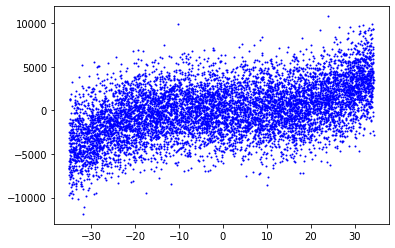

In [7]:
file = open('./train.pkl', 'rb') # make sure the mode is read. And reading must be done in binary.
load_data = pickle.load(file) # the data points are now contained in the load_data variable
number_data = len(load_data) # the length of the data set is in number_data
file.close()

file = open('./test.pkl', 'rb')
test_data_load = pickle.load(file)
number_test_data = len(test_data_load)



test_x = test_data_load[:, 0] # This is the x and y of the testing data sets
test_y = test_data_load[:, 1]


x = load_data[:, 0] # this is the x and y of the training data sets
y = load_data[:, 1]

plot.plot(x, y, 'b.', markersize = 2)


Now we have divided the data into 2 sets, x and y. Now it is time to resample the data.
### Task - 2.2.1: Re-Sampling the data

In [8]:
x_training_data_sets = []
y_training_data_sets = []
for i in range(0, 8000, 500):
    x_training_data_sets.append(x[i:i+500])
    y_training_data_sets.append(y[i:i+500])
    


Now at x_training_data_sets and y_training_data_sets we would be having the training sets delivered randomly.

### Task - 2.2.2 - Task

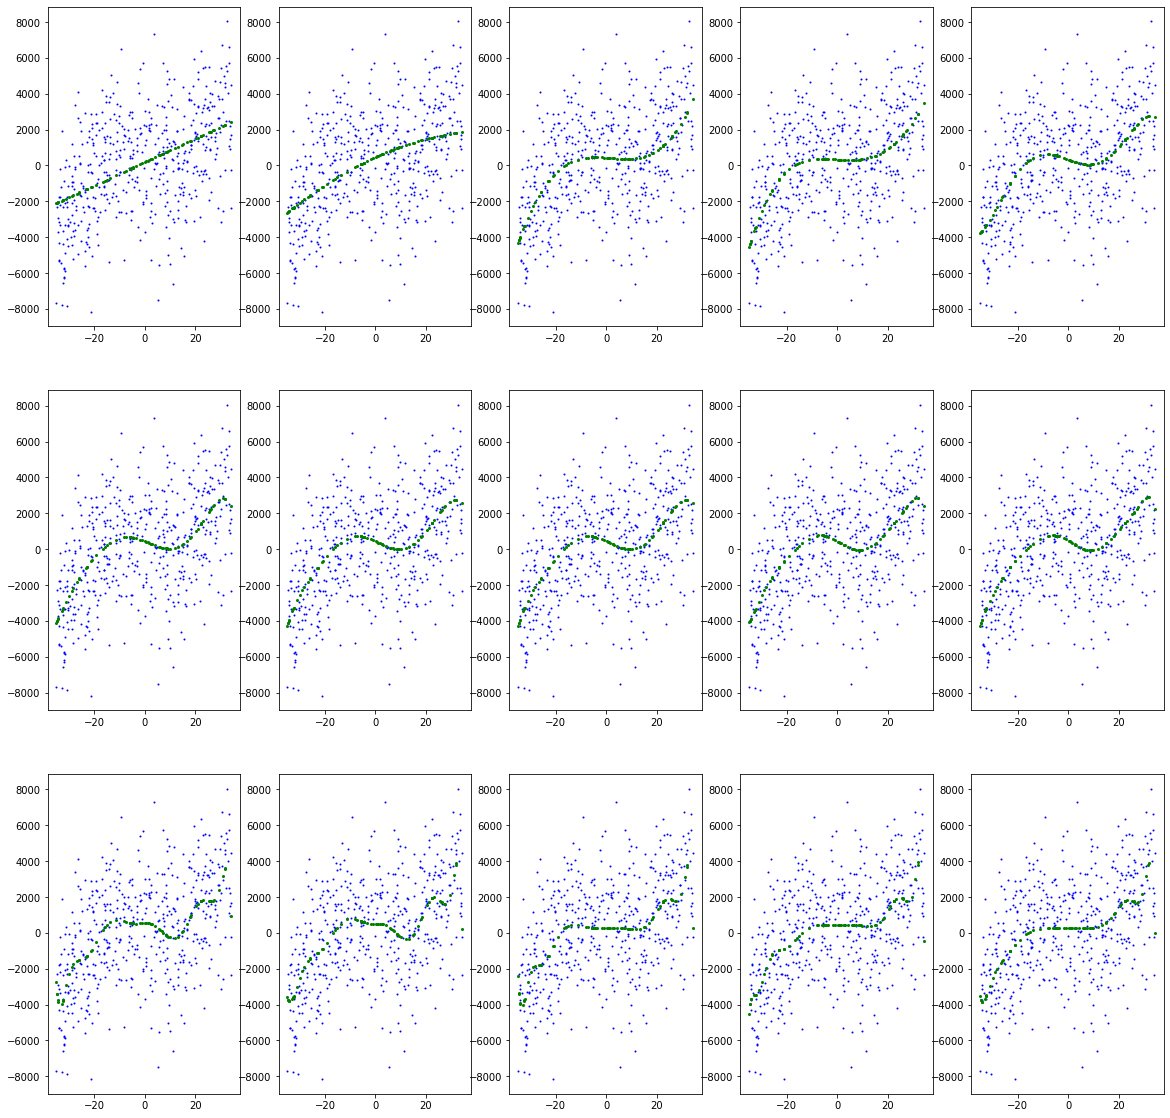

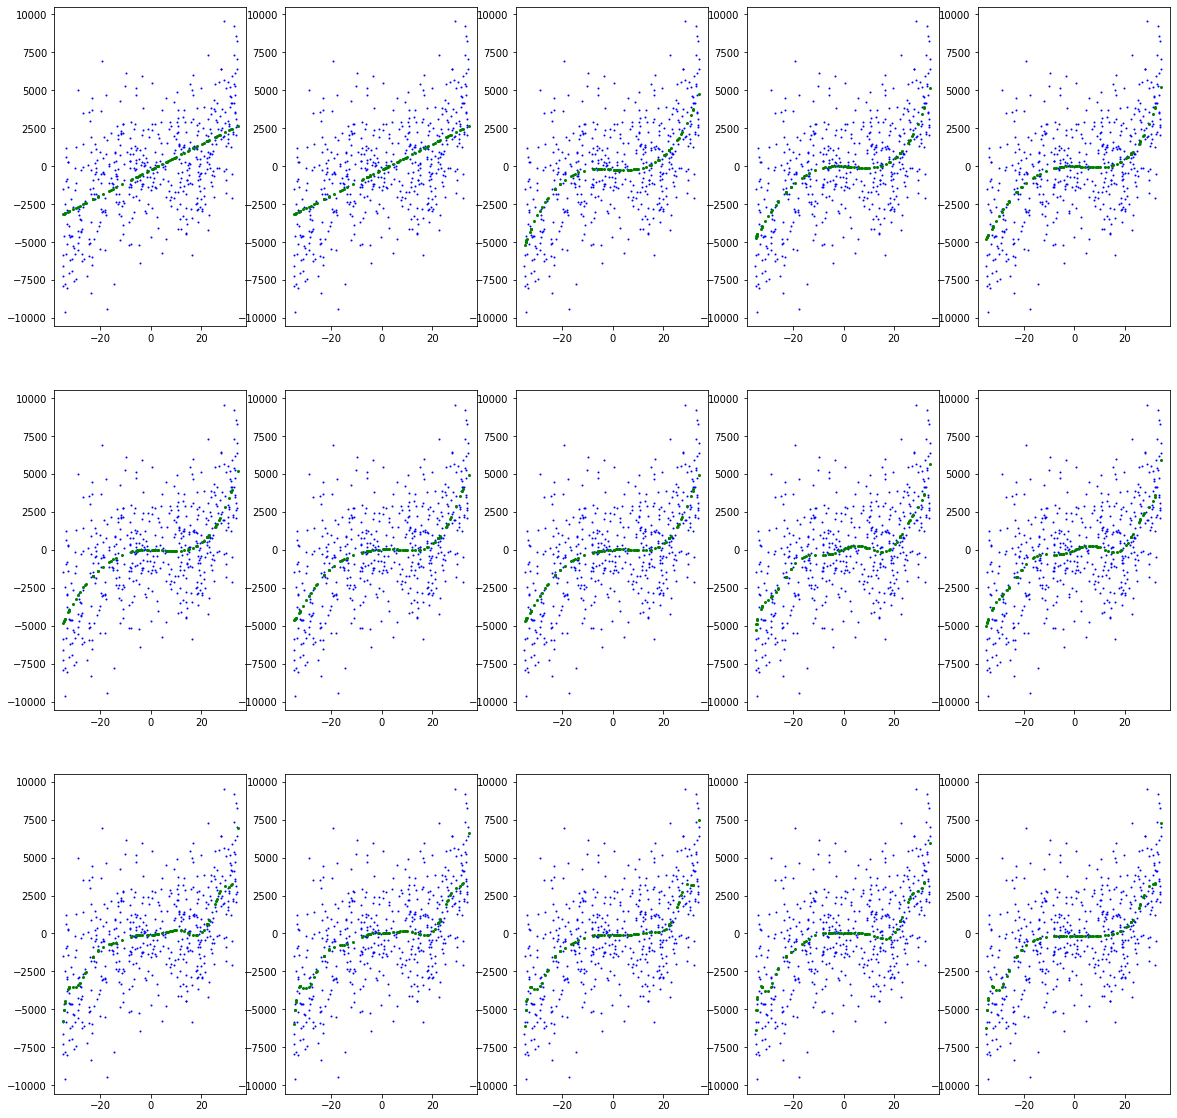

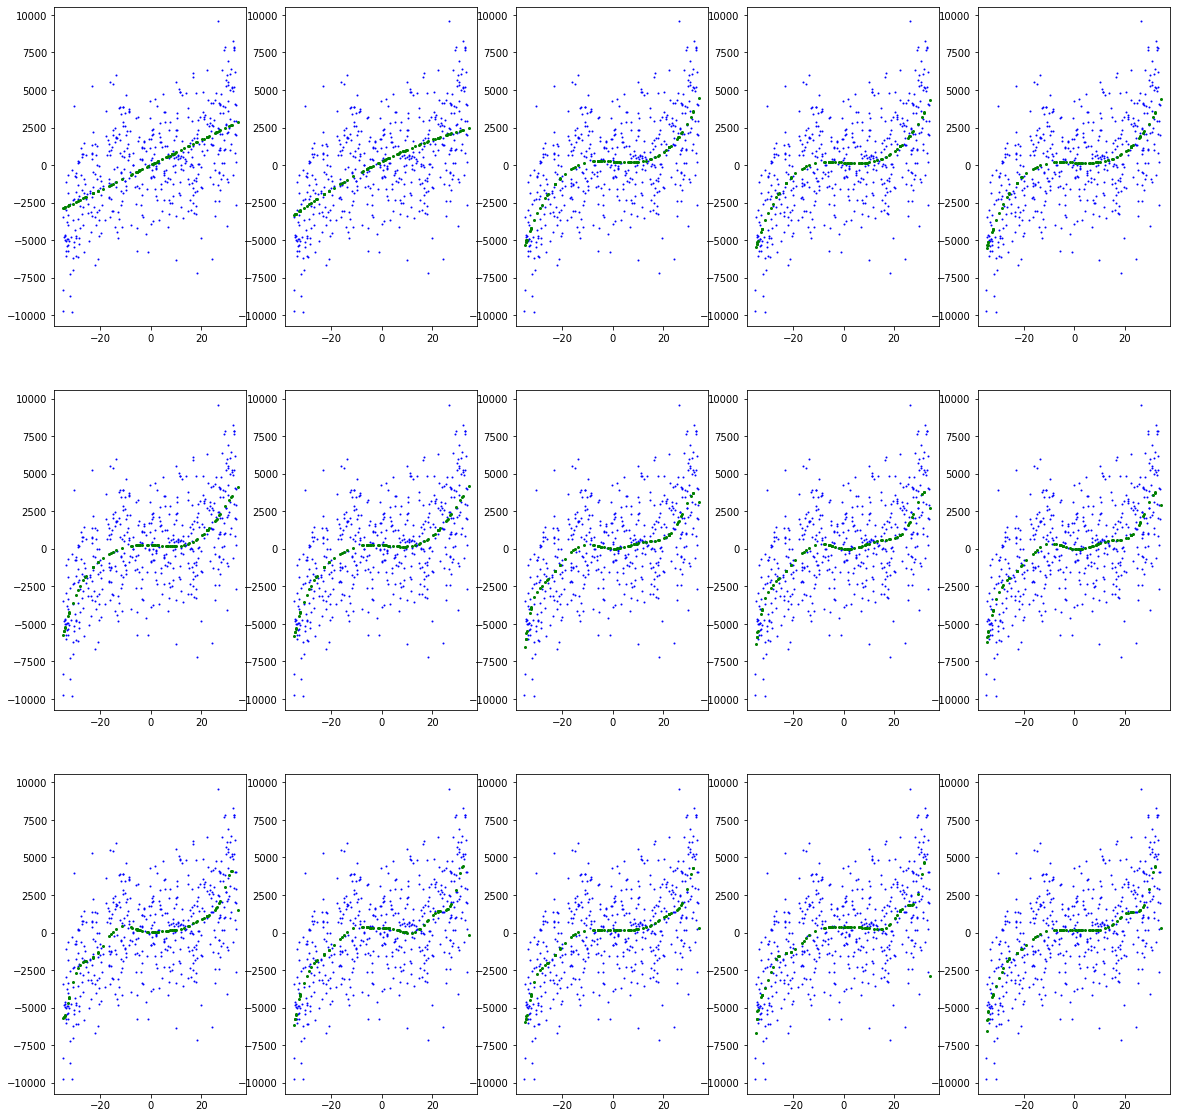

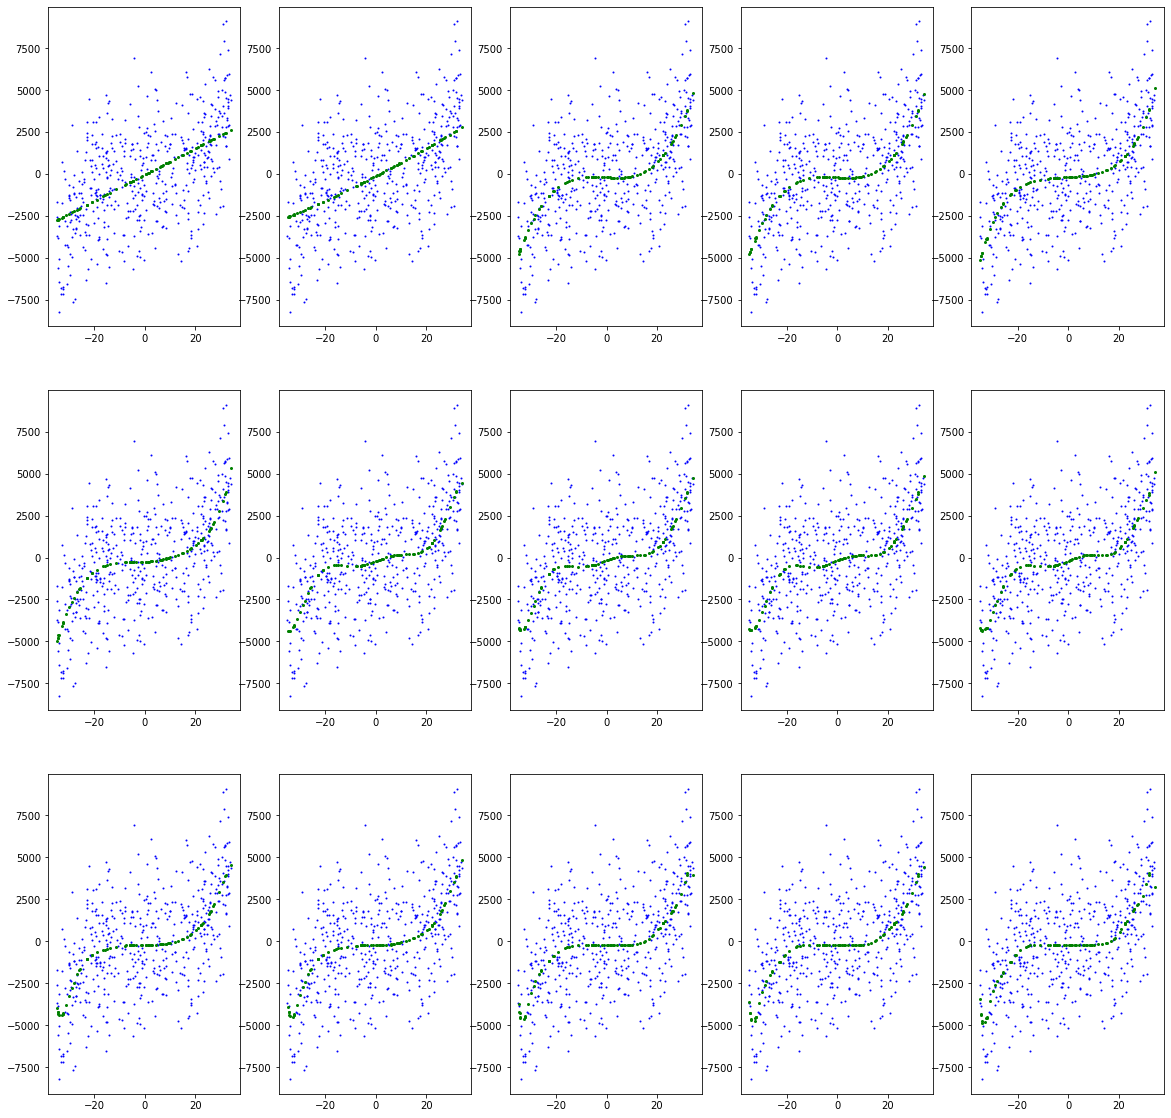

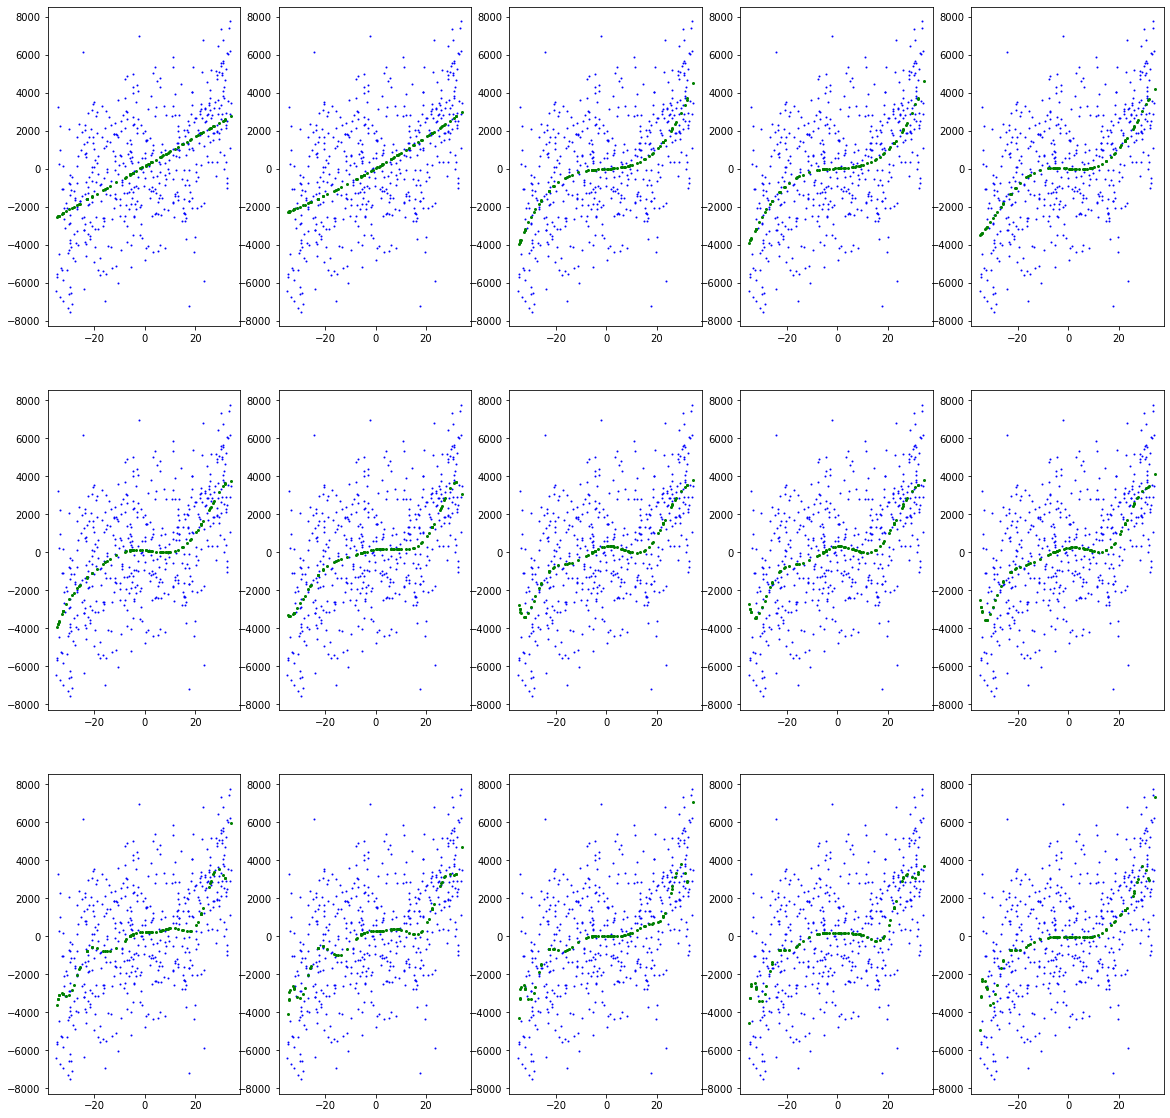

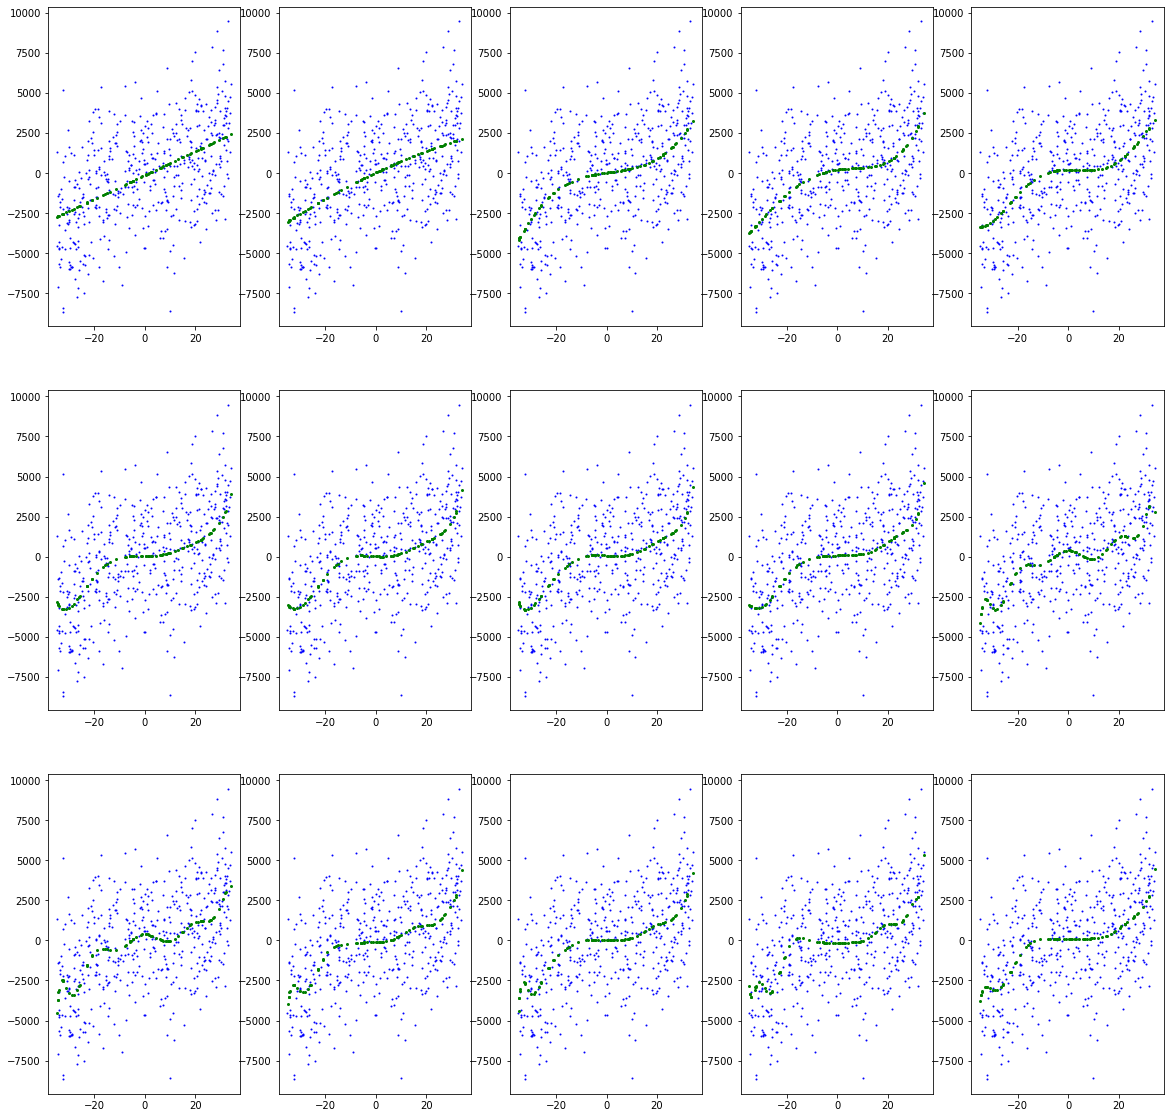

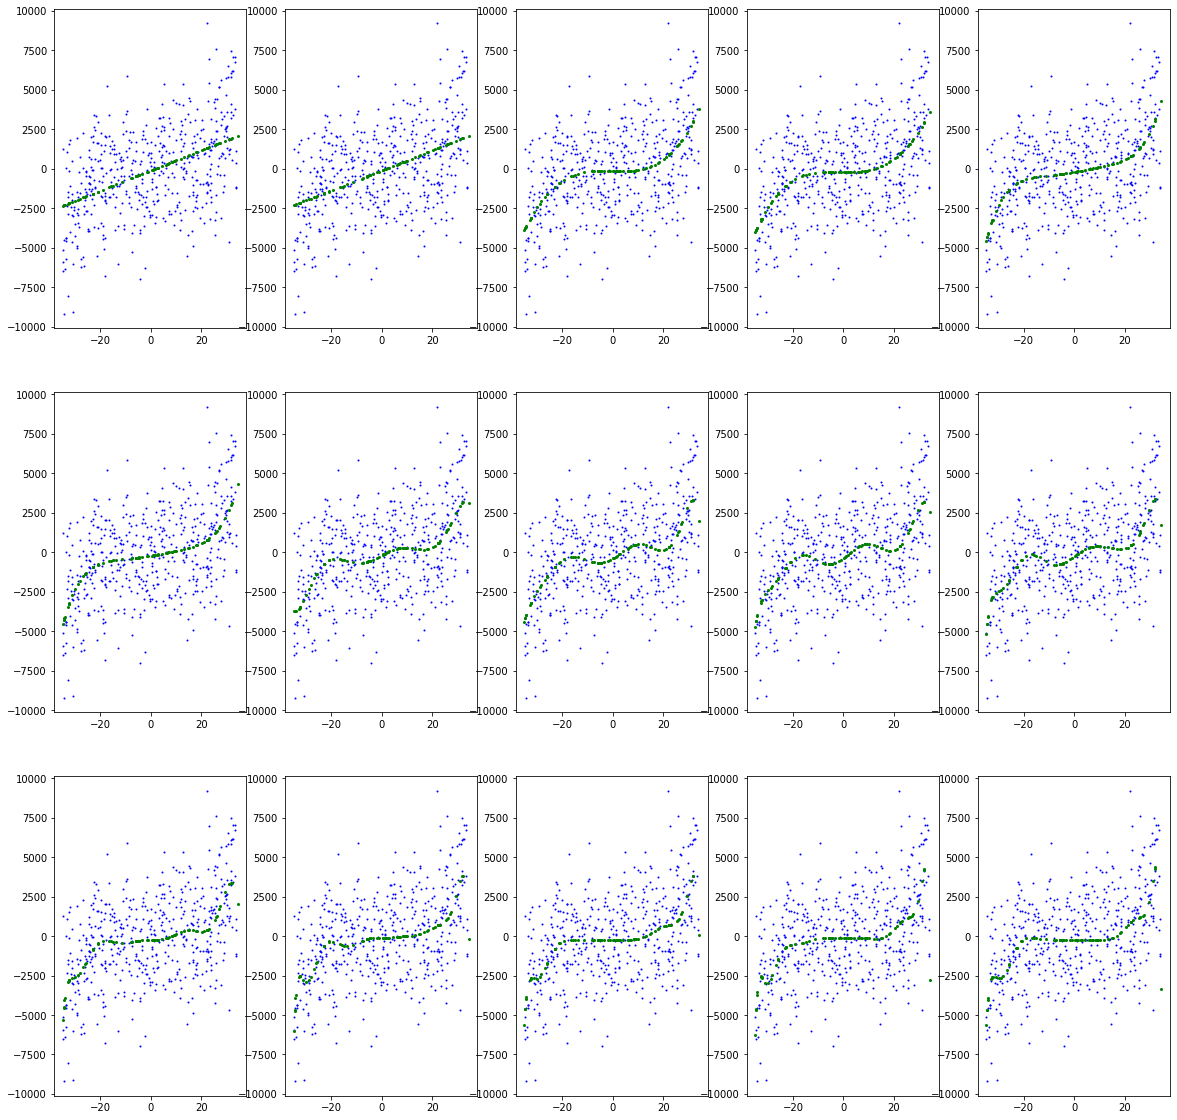

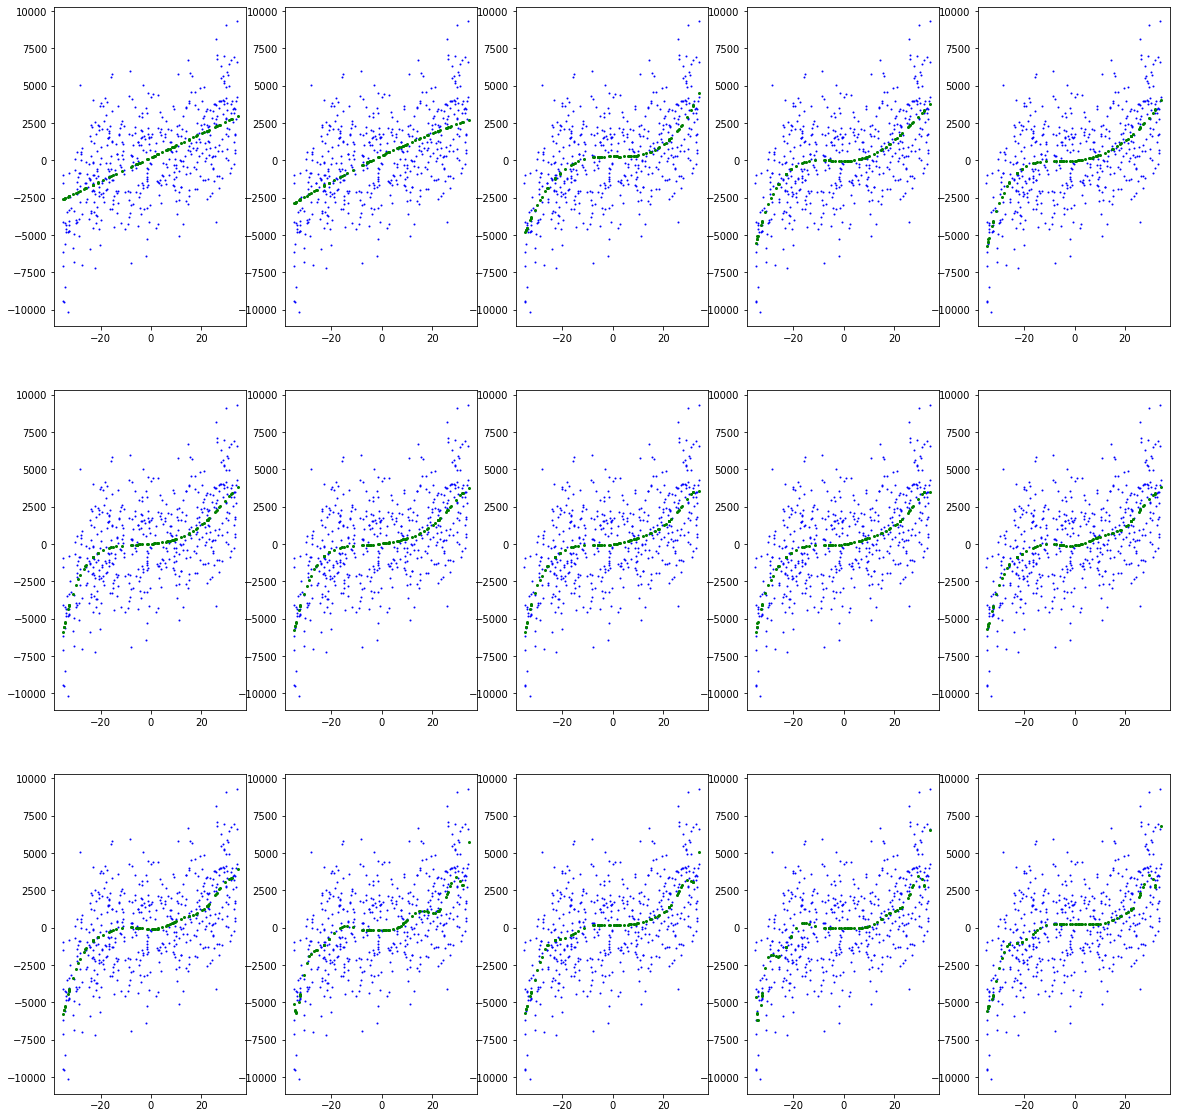

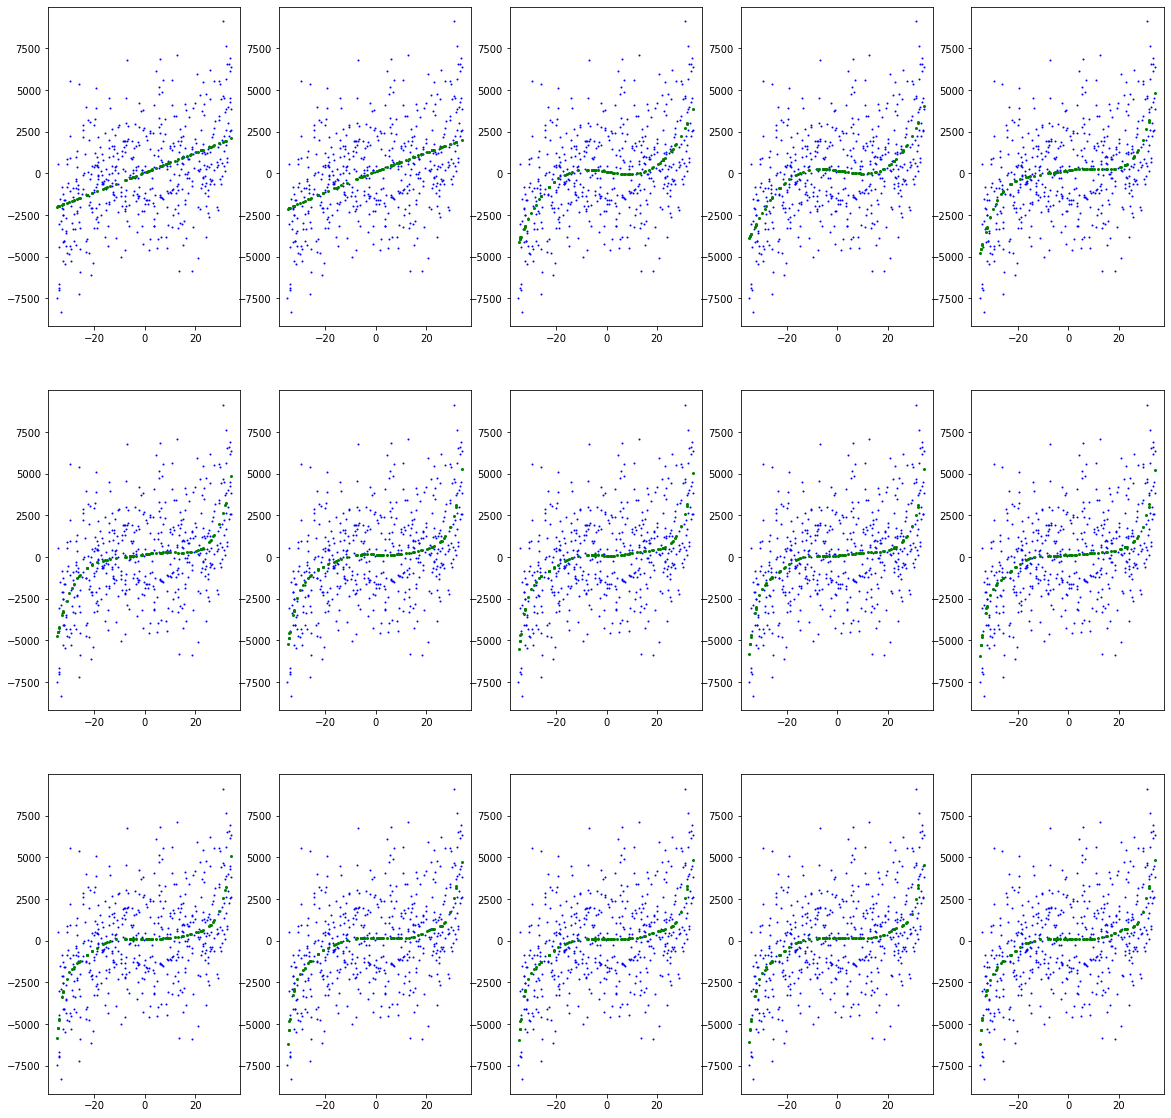

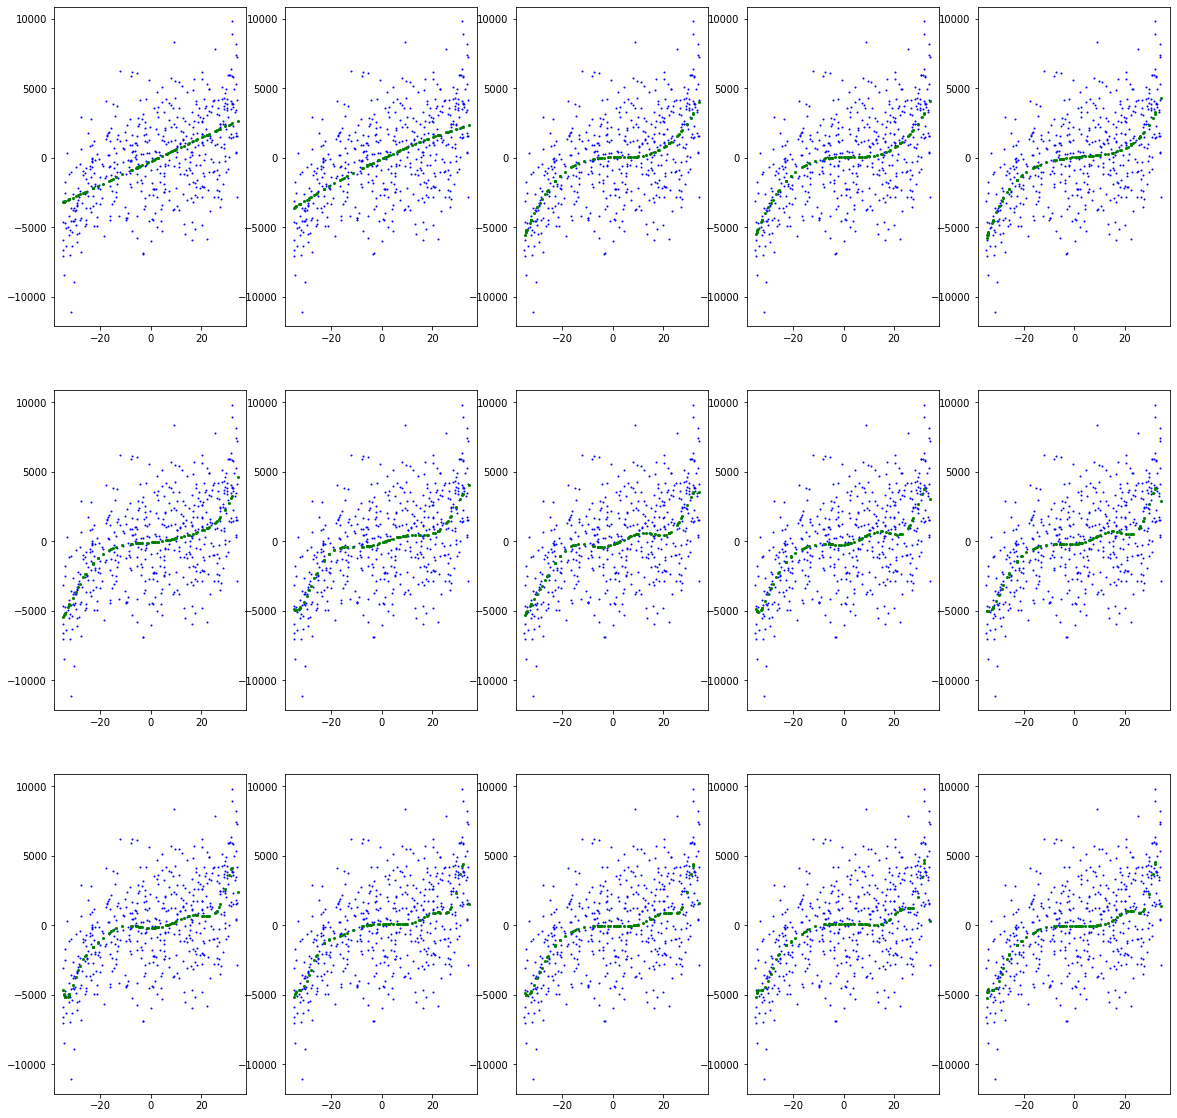

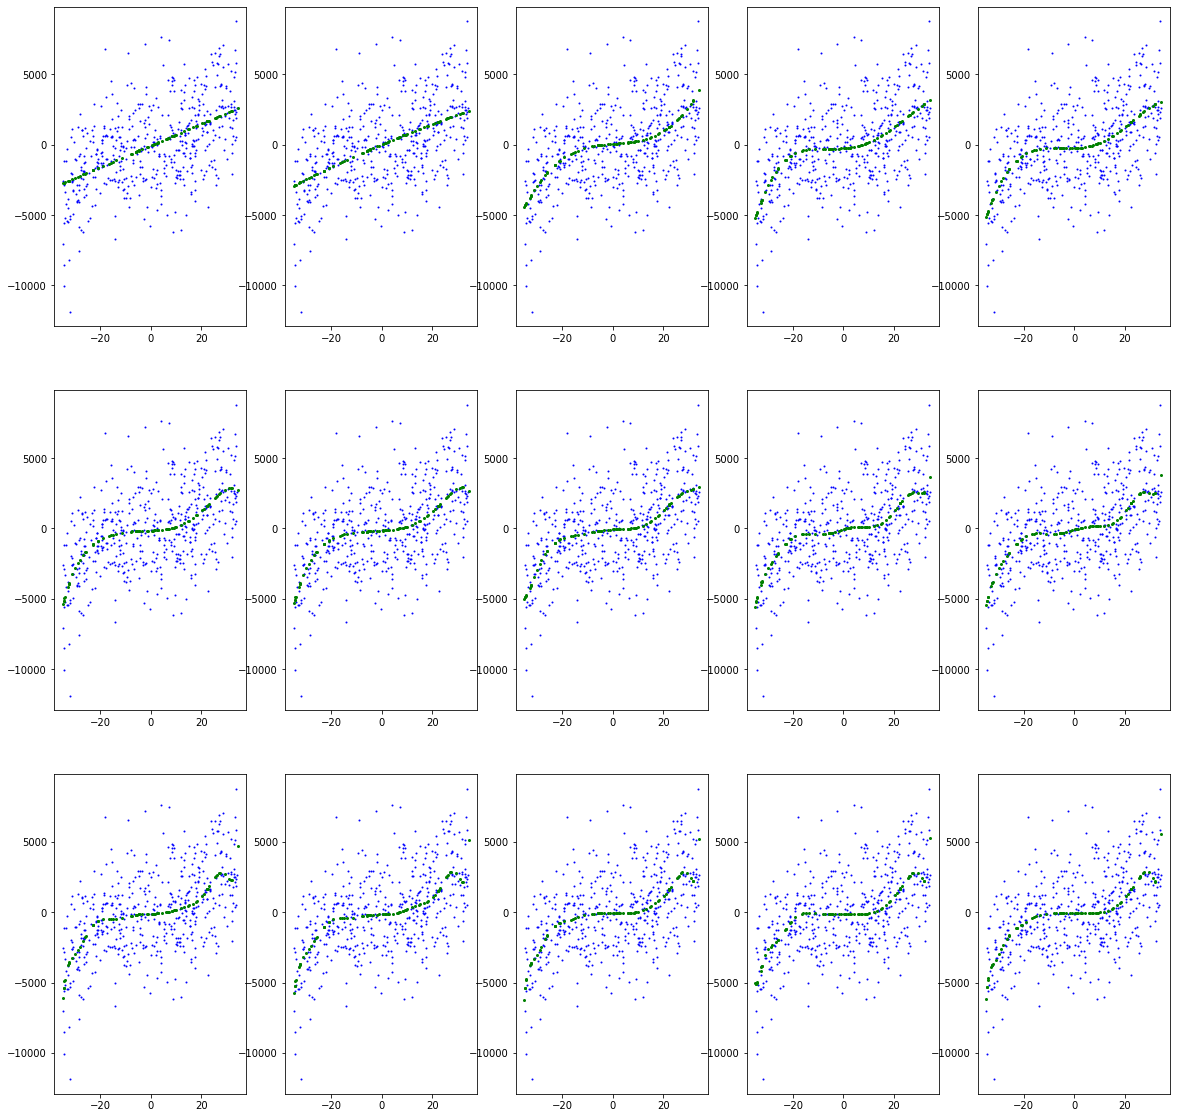

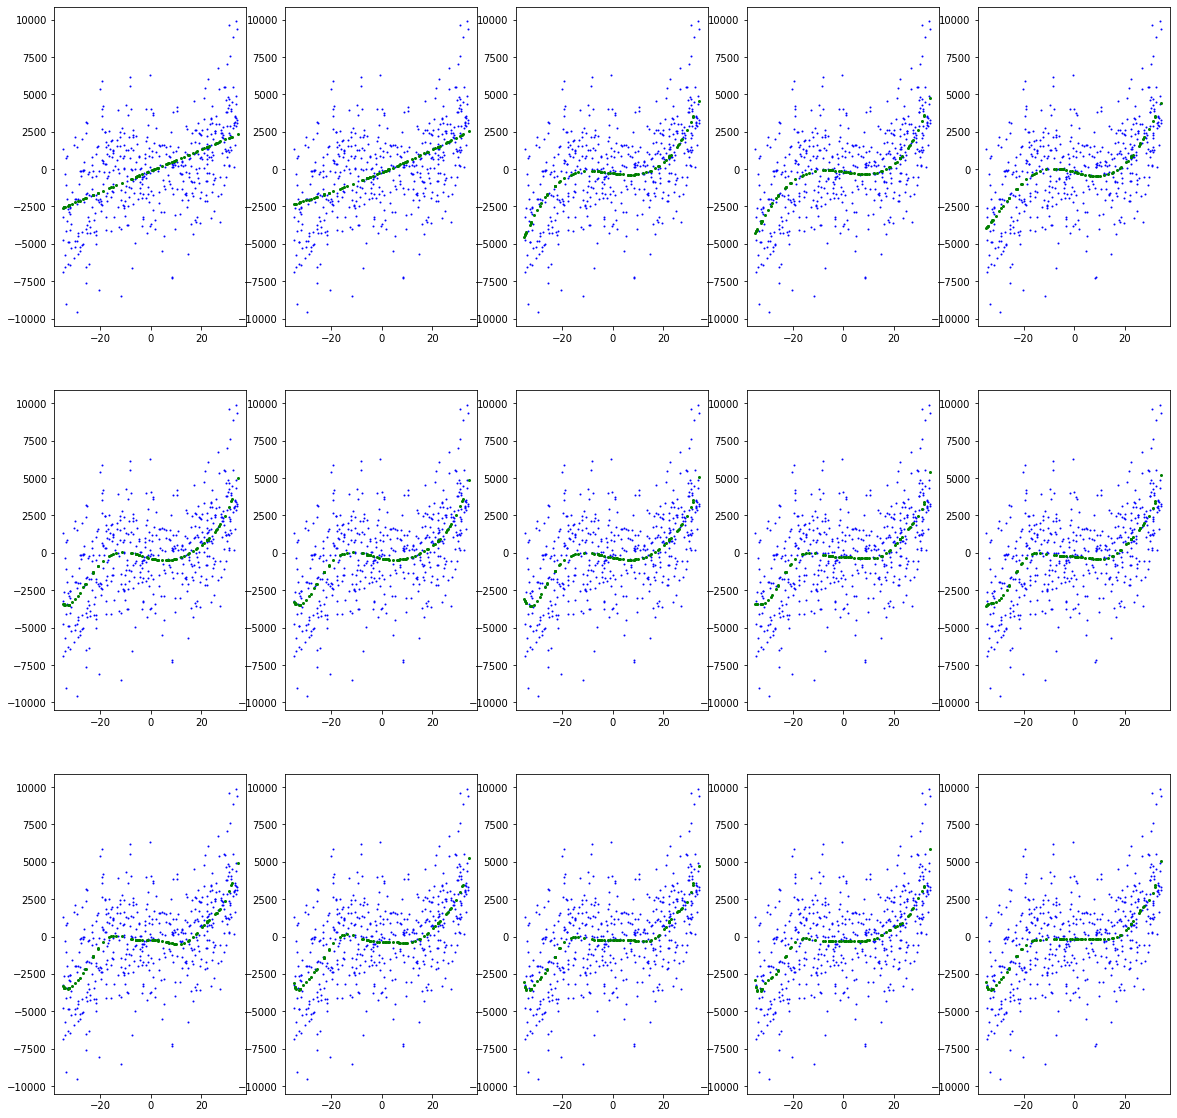

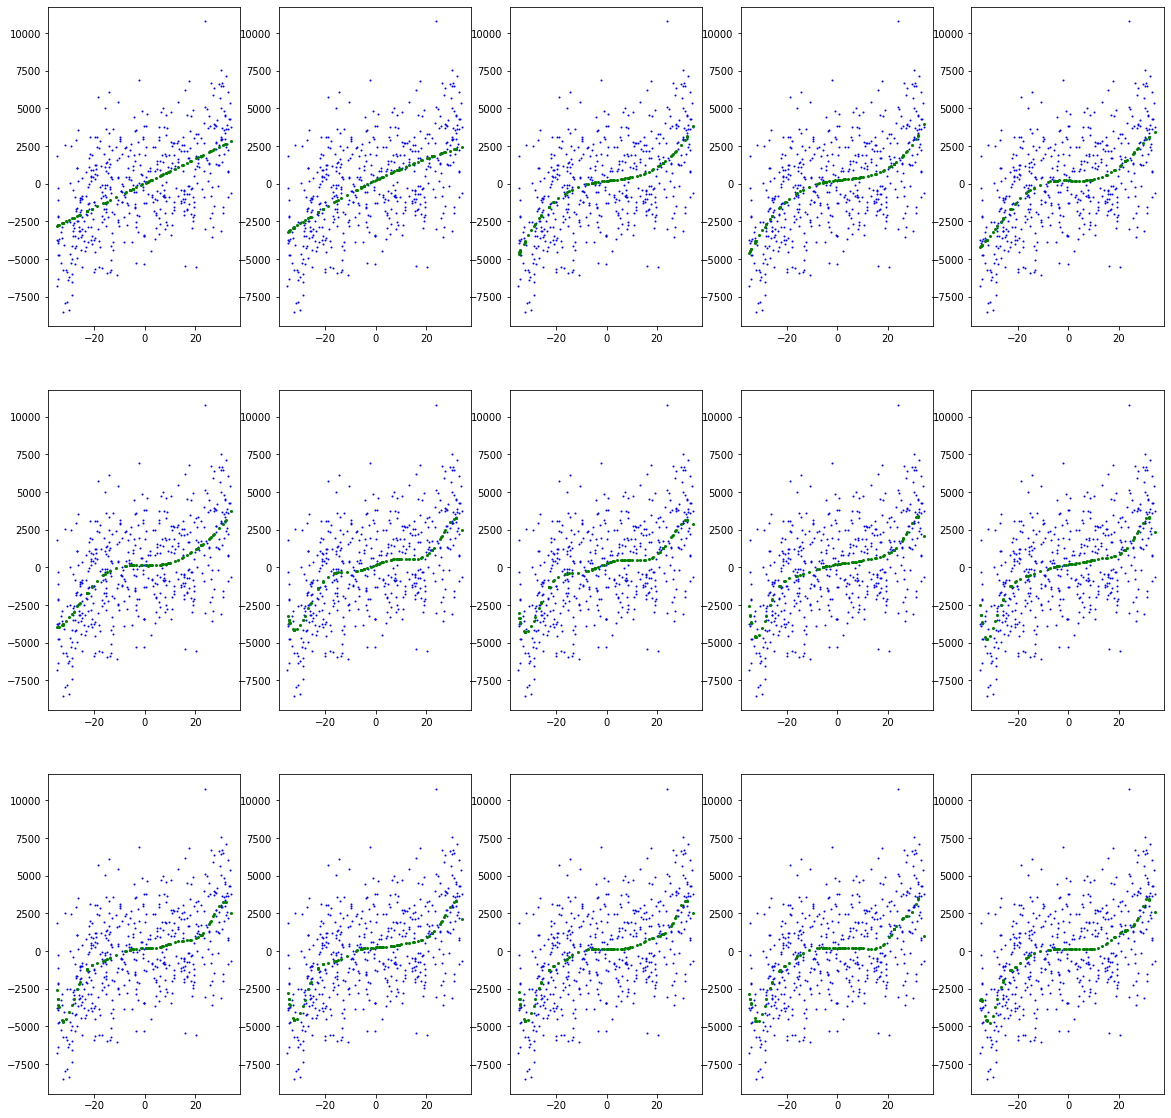

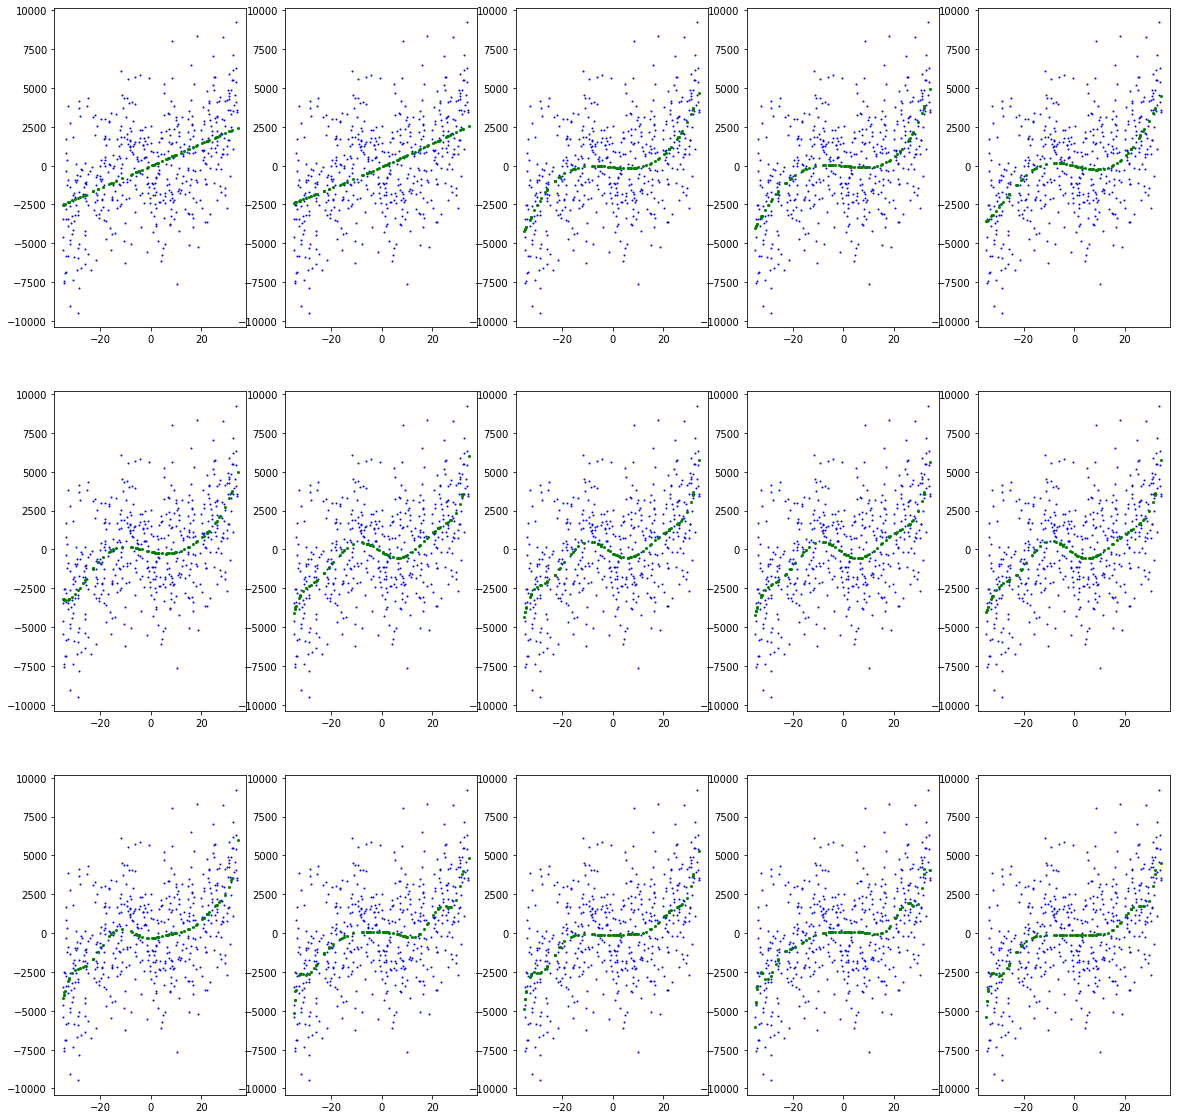

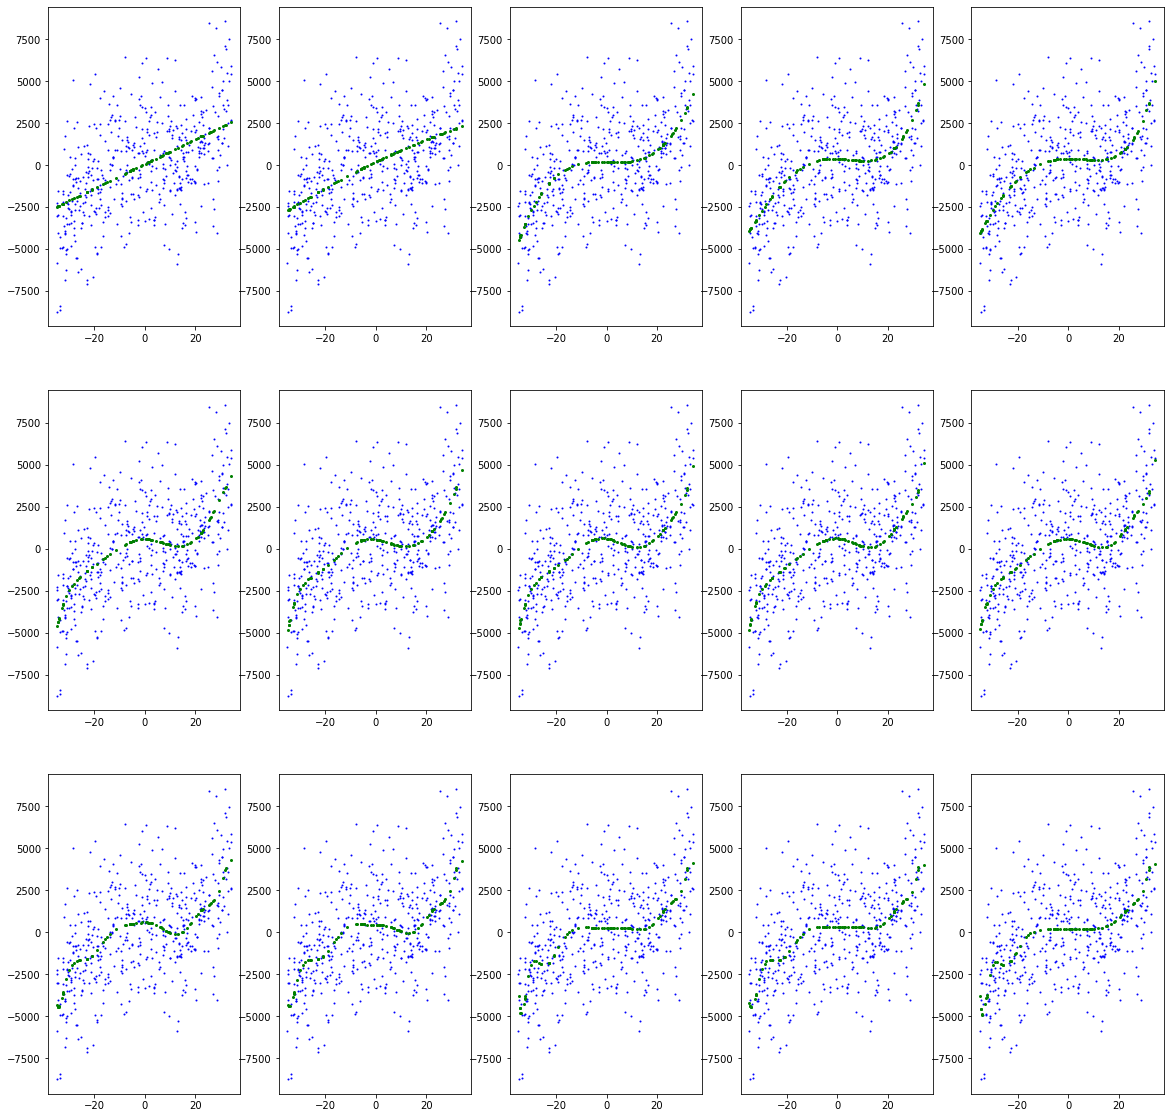

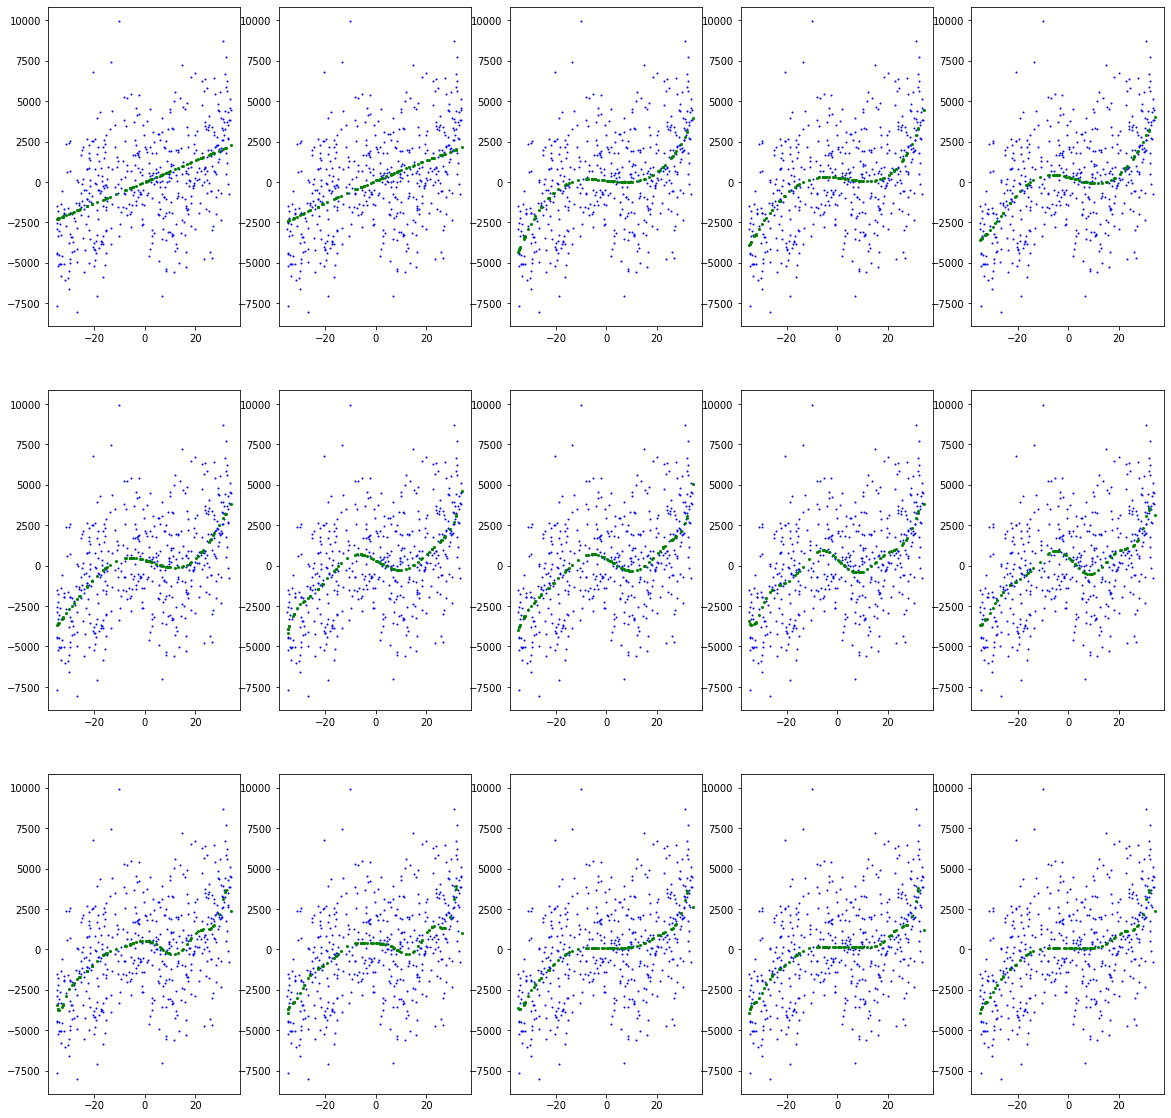

In [9]:
for i in range(16):
    
    fig, axes = plot.subplots(nrows=3, ncols=5, figsize=(20, 20))
    x = x_training_data_sets[i][:, np.newaxis]
    y = y_training_data_sets[i]
    for degree in range(0, 15):
        model = LinearRegression() #  Now we shall train the linear regression model for the training set
        axes[int(degree/5)][degree % 5].plot(x, y, 'b.', markersize = 2)
        x_train_poly = PolynomialFeatures(degree+1).fit_transform(x) 
        model.fit(x_train_poly, y) # THis is the step where we train the model, for 
        # since we are told to calculate the variance and bias based on the test set.
        y_predicted = model.predict(PolynomialFeatures(degree+1).fit_transform(test_x[:, np.newaxis]))
        axes[int(degree/5)][degree % 5].plot(test_x[:, np.newaxis], y_predicted, 'g.', markersize=4)
